In [82]:
import pandas
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [100]:
water_data_before = pandas.read_csv('../data/cleaned_before.csv')

In [101]:
water_data_before

,file_name,datetime,lock_movement,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
0,DVS1ZP_Converted/20200706_131712.txt,2020-07-06 13:17:12,closing,0,18.1,19.0,13.8,3044749.0
1,DVS1ZP_Converted/20200706_173238.txt,2020-07-06 17:32:38,opening,0,18.2,198.0,13.8,3795221.0
2,DVS1ZP_Converted/20200706_190034.txt,2020-07-06 19:00:34,opening,0,18.7,73.0,13.8,3681963.0
3,DVS1ZP_Converted/20200706_202747.txt,2020-07-06 20:27:47,opening,0,18.5,-41.0,13.8,3563955.0
4,DVS1ZP_Converted/20200706_211903.txt,2020-07-06 21:19:03,opening,0,18.0,-97.0,13.8,3651022.0
...,...,...,...,...,...,...,...,...
2661,DVS1ZP_Converted/20210809_063743.txt,2021-08-09 06:37:43,closing,0,19.5,52.0,15.6,3317596.0
2662,DVS1ZP_Converted/20210809_074602.txt,2021-08-09 07:46:02,opening,0,18.5,-32.0,15.6,3798238.0
2663,DVS1ZP_Converted/20210809_075330.txt,2021-08-09 07:53:30,closing,0,18.3,-32.0,15.6,3187327.0
2664,DVS1ZP_Converted/20210809_085932.txt,2021-08-09 08:59:32,opening,0,19.0,-99.0,15.6,3889010.0


In [102]:
# Separating features and target
X = water_data_before['water_temperature_C'].values.reshape(-1, 1)
y = water_data_before['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [103]:
from sklearn.metrics import mean_absolute_percentage_error


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean absolute Percentage Error: {mape * 100}")

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Percentage Error: 6.354408695090008
Mean absolute Error: 210952.54072400404
R-squared: 0.11130975939517529


Text(0.5, 1.0, 'Energy proxy voorspellingen van lineair regessie model v echte waarden')

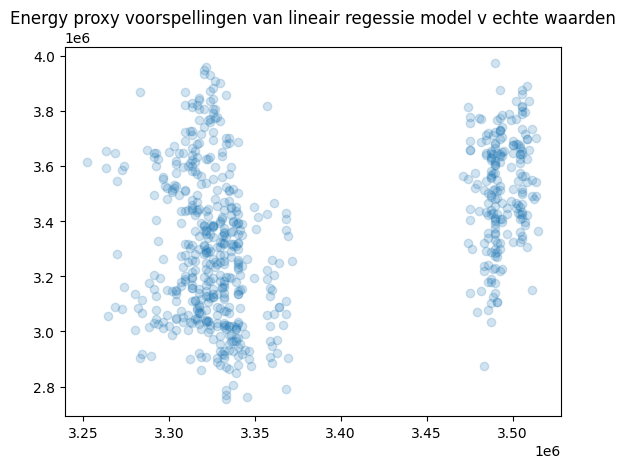

In [104]:
plot.scatter(y_pred, y_test, alpha=0.2)
plot.title('Energy proxy voorspellingen van lineair regessie model v echte waarden')

In [105]:
water_data_after = pandas.read_csv('../data/cleaned_after.csv')

In [106]:
water_data_after

,file_name,datetime,lock_movement,undercarriage_replacement,water_temperature_C,water_level_cmNAP,air_temperature_01C,energy_proxy
0,DVS1ZP_Converted/20220513_084918.txt,2022-05-13 08:49:18,opening,1,15.6,-95.0,11.0,2401922.0
1,DVS1ZP_Converted/20220513_100149.txt,2022-05-13 10:01:49,opening,1,15.6,-39.0,11.0,2912658.0
2,DVS1ZP_Converted/20220513_112250.txt,2022-05-13 11:22:50,opening,1,15.6,59.0,11.0,2802840.0
3,DVS1ZP_Converted/20220513_130551.txt,2022-05-13 13:05:51,opening,1,15.7,168.0,10.7,2906343.0
4,DVS1ZP_Converted/20220513_132131.txt,2022-05-13 13:21:31,opening,1,15.7,171.0,10.7,2867409.0
...,...,...,...,...,...,...,...,...
3476,DVS1ZP_Converted/20230815_000205.txt,2023-08-15 00:02:05,opening,1,20.3,-14.0,12.4,2679450.0
3477,DVS1ZP_Converted/20230815_034130.txt,2023-08-15 03:41:30,opening,1,20.2,171.0,12.4,2680340.0
3478,DVS1ZP_Converted/20230815_045959.txt,2023-08-15 04:59:59,opening,1,20.1,92.0,12.4,2791437.0
3479,DVS1ZP_Converted/20230815_064418.txt,2023-08-15 06:44:18,opening,1,20.1,-14.0,12.4,2629123.0


In [107]:
# Separating features and target
X = water_data_after['water_temperature_C'].values.reshape(-1, 1)
y = water_data_after['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [108]:
from sklearn.metrics import mean_absolute_percentage_error


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean absolute Percentage Error: {mape * 100}")

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Percentage Error: 6.147166152239115
Mean absolute Error: 158430.28197014637
R-squared: 0.13791815657152662


Text(0.5, 1.0, 'Energy proxy voorspellingen van lineair regessie model v echte waarden')

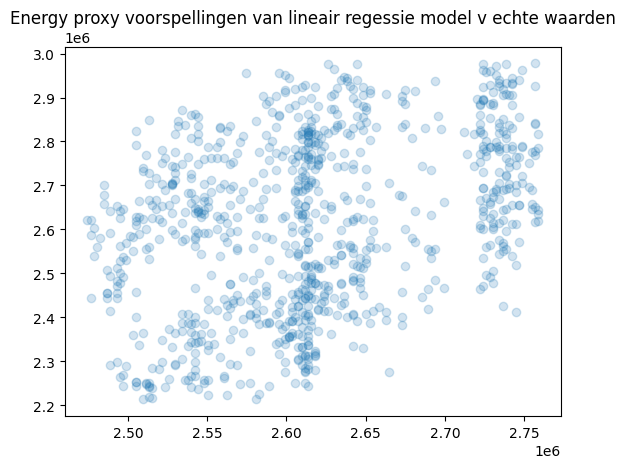

In [109]:
plot.scatter(y_pred, y_test, alpha=0.2)
plot.title('Energy proxy voorspellingen van lineair regessie model v echte waarden')

In [110]:
all_water_data = pandas.read_csv('../data/cleaned_all.csv')
all_water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   file_name                  6147 non-null   object 
 1   datetime                   6147 non-null   object 
 2   lock_movement              6147 non-null   object 
 3   undercarriage_replacement  6147 non-null   int64  
 4   water_temperature_C        6147 non-null   float64
 5   water_level_cmNAP          6147 non-null   float64
 6   air_temperature_01C        6147 non-null   float64
 7   energy_proxy               6147 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 384.3+ KB


In [111]:
X = all_water_data['water_temperature_C'].values.reshape(-1, 1)
y = all_water_data['energy_proxy']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
len(X)

6147

In [112]:
from sklearn.metrics import mean_absolute_percentage_error


linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# voorspellen met test set
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean absolute Percentage Error: {mape * 100}")

# Print the scores
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean absolute Percentage Error: 12.631400499231024
Mean absolute Error: 370236.9274401619
R-squared: 0.07296723345030254


Text(0.5, 1.0, 'Energy proxy voorspellingen van lineair regessie model v echte waarden')

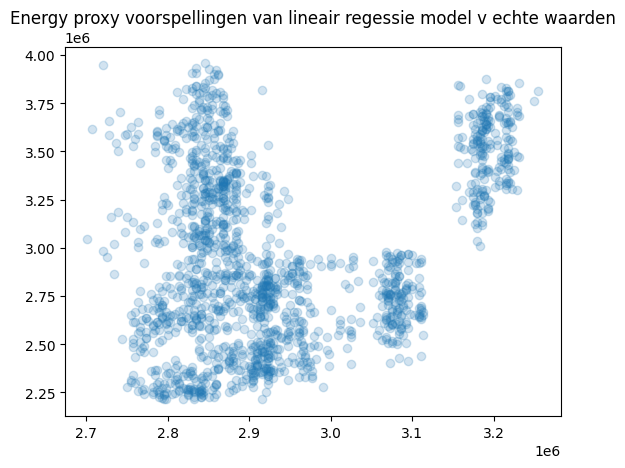

In [113]:
plot.scatter(y_pred, y_test, alpha=0.2)
plot.title('Energy proxy voorspellingen van lineair regessie model v echte waarden')